<a href="https://colab.research.google.com/github/ajeet966/Machinelearning/blob/main/SMS_messages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Try reading the file with a different encoding, like 'latin-1'
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Print the column names to see the available columns
print(data.columns)

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Join tokens back into text
    text = ' '.join(tokens)
    return text

# Assuming the text column is named 'v2' (replace with the actual name)
data['processed_text'] = data['v2'].apply(preprocess_text)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the processed text
X = vectorizer.fit_transform(data['processed_text'])

# Target variable - check the name in the 'spam.csv' file
y = data['v1'] # Replace 'v1' with the actual column name for labels in your data

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate Naive Bayes classifier
print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classifier:
Accuracy: 0.9659192825112107
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)

# Train the classifier
lr_classifier.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_classifier.predict(X_test)

# Evaluate Logistic Regression classifier
print("Logistic Regression Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classifier:
Accuracy: 0.9426008968609866
Classification Report:
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       965
        spam       0.96      0.60      0.74       150

    accuracy                           0.94      1115
   macro avg       0.95      0.80      0.85      1115
weighted avg       0.94      0.94      0.94      1115



Support Vector Machine (SVM) Classifier:
Accuracy: 0.967713004484305
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       0.98      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.92      1115
weighted avg       0.97      0.97      0.97      1115



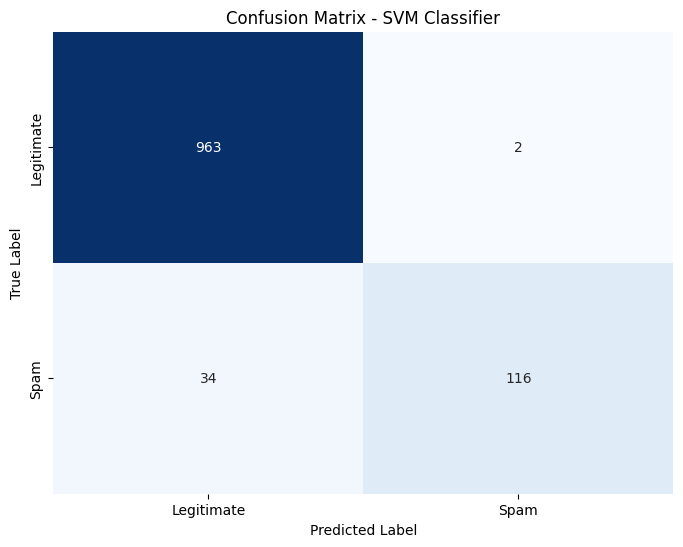

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate SVM classifier
print("Support Vector Machine (SVM) Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Legitimate', 'Spam'], yticklabels=['Legitimate', 'Spam'])
plt.title('Confusion Matrix - SVM Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
